## Import

In [455]:
from matplotlib import pyplot as plt

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam, Adamax

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

import sklearn.metrics as metrics

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [456]:
data = pd.read_csv("cocacola.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...,...
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900


In [457]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [458]:
data.index = data.pop('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...
2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800


In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [460]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


In [461]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [462]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

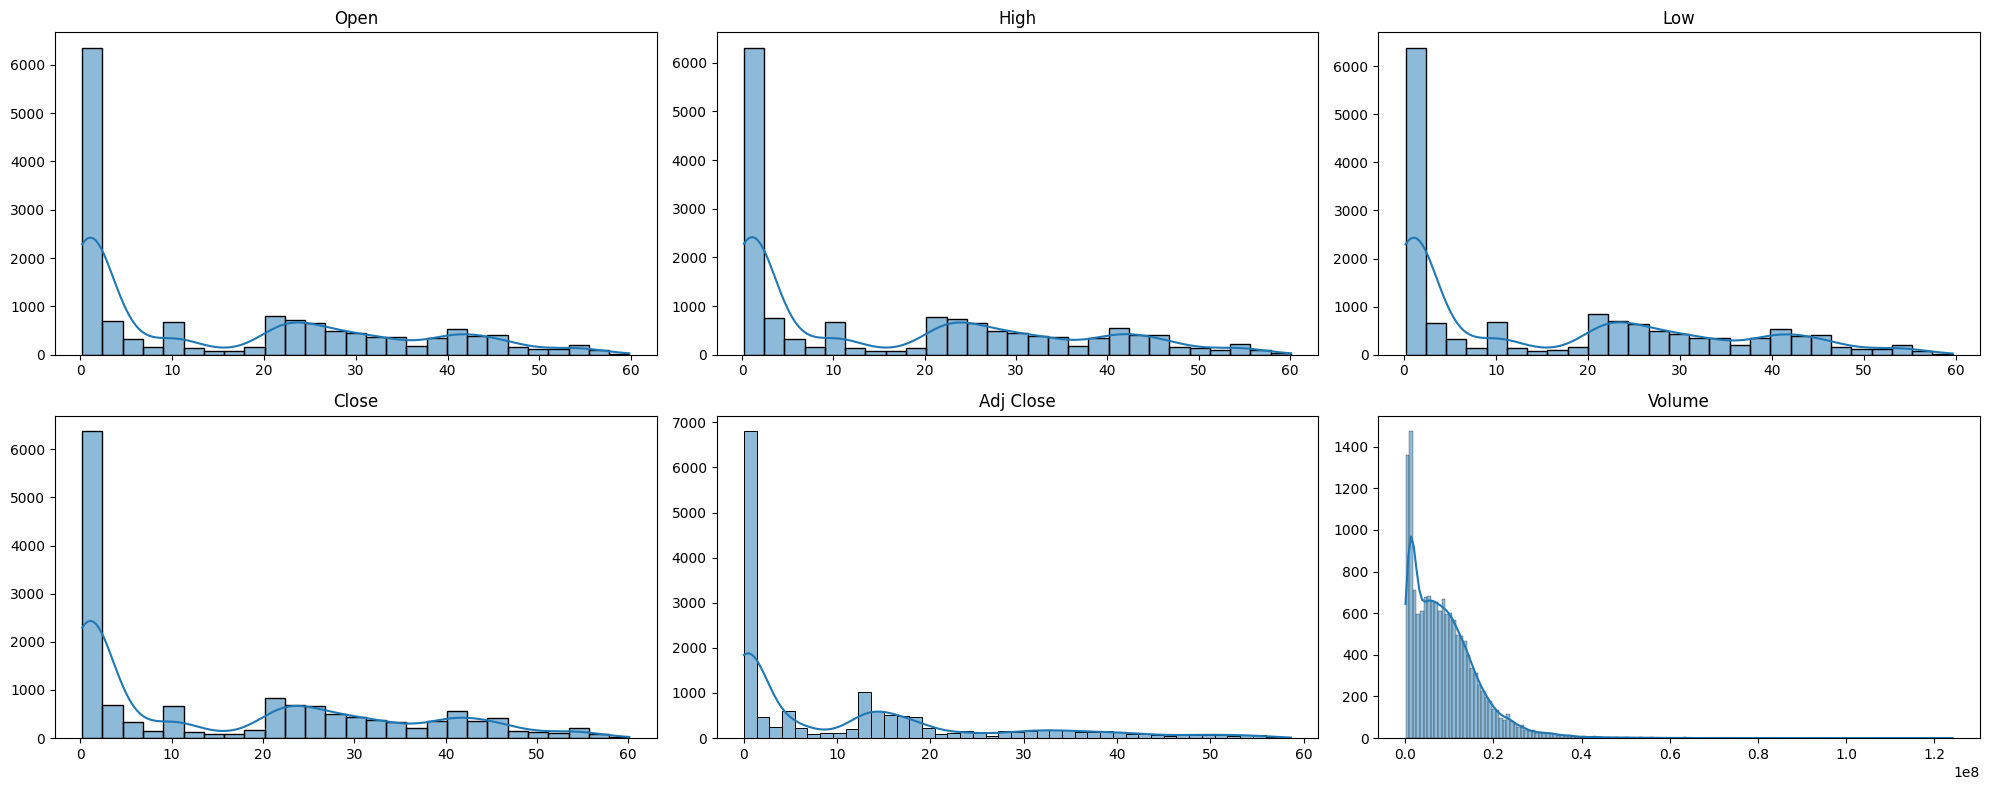

In [463]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

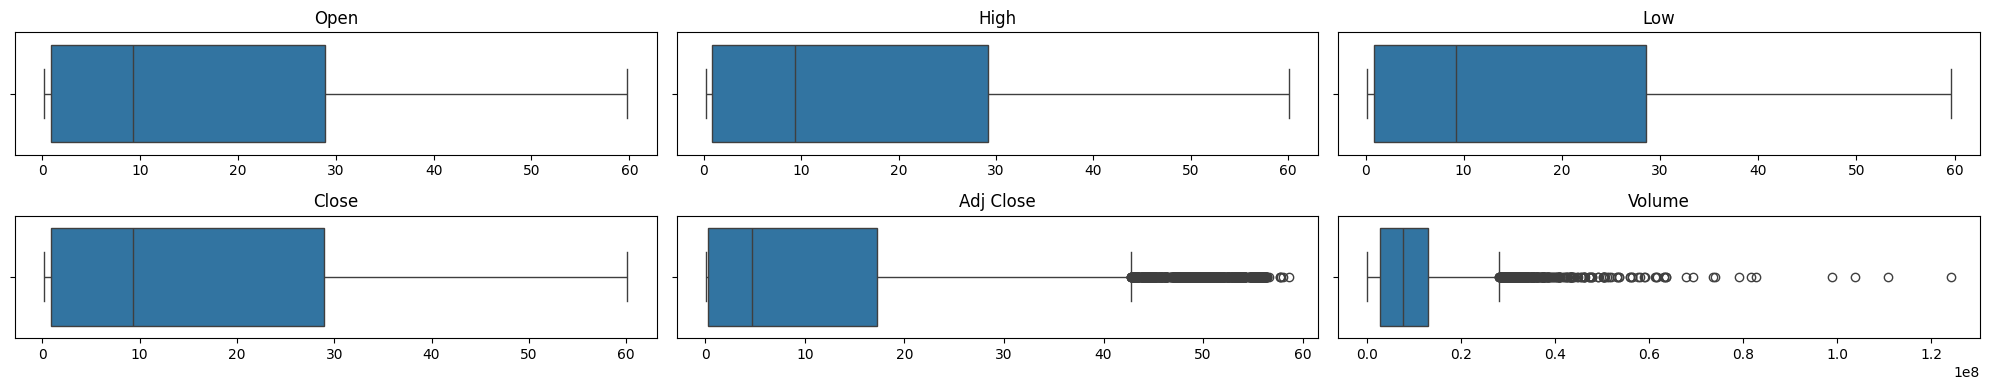

In [464]:
fig, axes = plt.subplots(2, 3, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [465]:
def plot(data, columns, x):
    fig, axes = plt.subplots(3, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

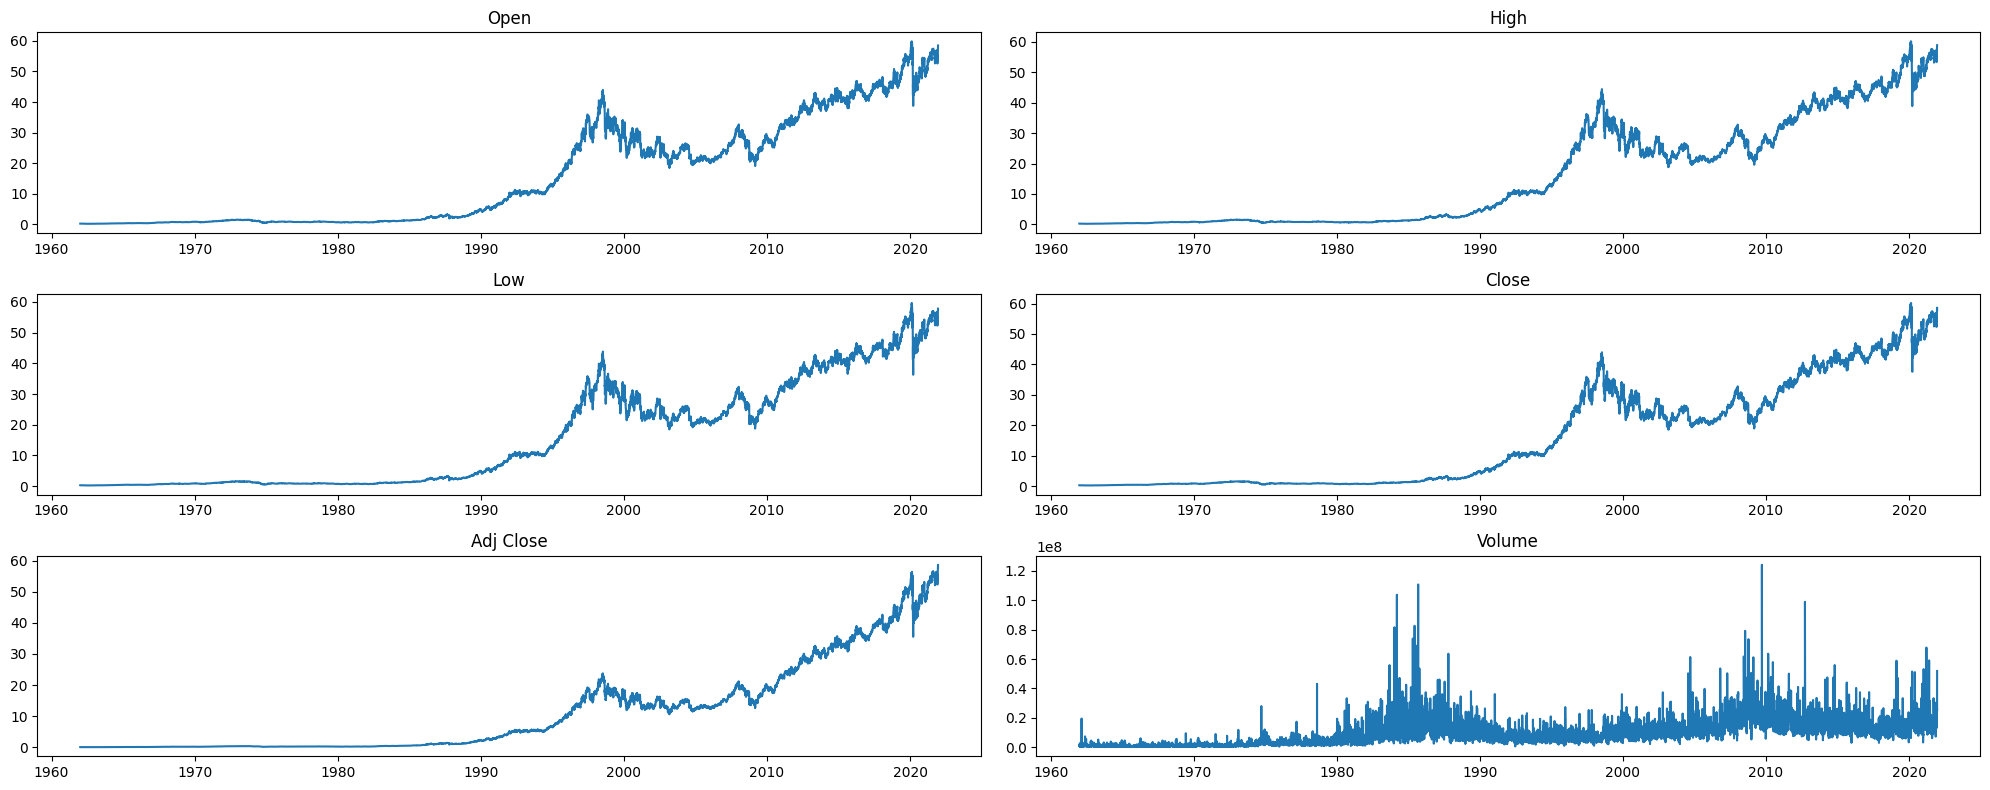

In [466]:
plot(data, columns, 'Date')

In [467]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


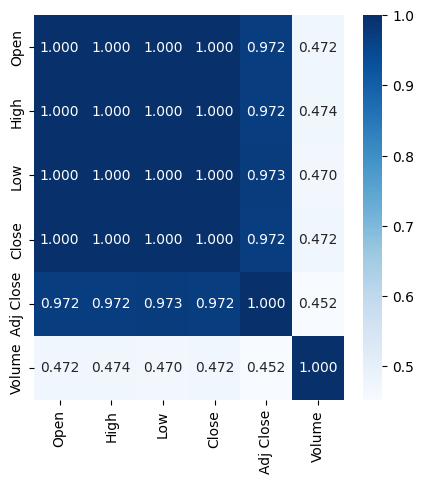

In [468]:
df_corr = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

Podela podataka na train, val i test skup (70%, 20%, 10%).

In [469]:
data = data.drop(columns=['High', 'Low', 'Open', 'Adj Close', 'Volume'])

In [470]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (10567, 1) 
Validation size :  (3019, 1) 
Test Size :  (1510, 1)


,Close
Date,
1962-01-02,0.263021
1962-01-03,0.257161
1962-01-04,0.259115
1962-01-05,0.253255
1962-01-08,0.250651
...,...
2003-12-16,25.340000
2003-12-17,25.084999
2003-12-18,24.969999


In [471]:
train_df.columns

Index(['Close'], dtype='object')

Normalizacija podataka

In [472]:
scaler = MinMaxScaler()

col = ['Close']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [473]:
target = ['Close']

def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size][target])
    return np.array(X), np.array(Y)

In [474]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 10, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 10, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 10, 1)

In [475]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (10557, 10, 1) (10557, 1) 
 Val size :  (3009, 10, 1) (3009, 1) 
 Test Size :  (1500, 10, 1) (10557, 1)


pomocne funkcije

In [476]:
results = pd.DataFrame(columns=['Model', 'mean abs', 'R2', 'mean sqrd'])


In [477]:

def print_result(model, model_name, X_test, y_test, end=-1):

    y_pred = model.predict(X_test)

    mean_abs = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean_sqrd = metrics.mean_squared_error(y_test, y_pred)

    results.loc[len(results)] = [model_name, mean_abs, r2, mean_sqrd]

    # fig, axs = plt.subplots(4, 2, figsize=(12, 12)) 

    # for k in range(0,8):
    #     i = k // 2 
    #     j = k % 2   
        
    #     axs[i, j].plot(y_test[:, k], label='True')   
    #     axs[i, j].plot(y_pred[:, k], label='Predicted') 
    #     axs[i, j].set_xlabel(data.columns[k])  
    #     axs[i, j].legend()

    plt.plot(y_test, label='True')   
    plt.plot(y_pred, label='Predicted') 
    plt.tight_layout()  
    plt.show()


    display(results)



In [478]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)


Modeli


In [479]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# SimpleRNN

### Adam

#### simple RNN

In [480]:

model_srnn = Sequential()
model_srnn.add(SimpleRNN(units = 20, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_srnn.add(Dense(20, activation='relu'))
model_srnn.add(Dense(units = 1))
model_srnn.compile(optimizer=Adam(learning_rate=0.001), loss = "mean_squared_error")
history = model_srnn.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 50, batch_size = 32, callbacks=[ history, early_stopping] )


Epoch 1/50
 73/330 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0537

330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0198 - val_loss: 1.1664e-04
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2829e-05 - val_loss: 2.0672e-04
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0532e-05 - val_loss: 1.0666e-04
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.4296e-05 - val_loss: 1.0941e-04
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4143e-05 - val_loss: 1.2406e-04
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.2173e-05 - val_loss: 7.8723e-04
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6208e-05 - val_loss: 7.1601e-04
Epoch 8/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.9182e-05 - val_loss: 1.0397e-04
Epoch 9/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7827e-05 - val_loss: 1.3231e-04
Epoch 10/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6919e-05 - val_loss: 1.0212e-04
Epoch 11/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8294e-05 - 

In [481]:
model_srnn.evaluate(X_test,Y_test)
model_srnn.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1609e-04


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_48 (SimpleRNN)       │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,645 (10.34 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,764 (6.89 KB)

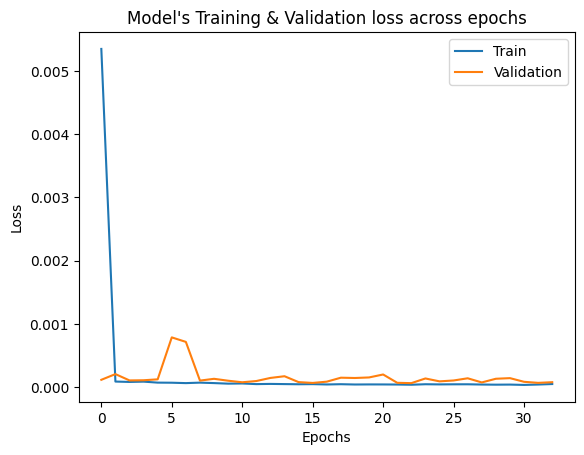

27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


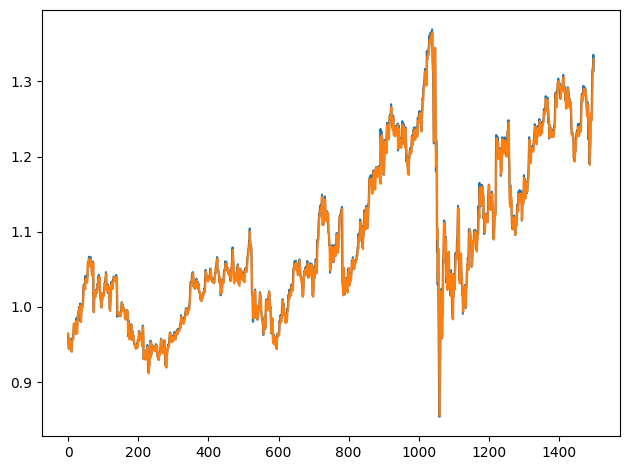

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191


In [482]:

plotloss(history)
print_result(model_srnn, 'SimpleRNN 20 units, Adam', X_test, Y_test, 200)


#### 50 units and early stopping

In [483]:
model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = len(target), activation='sigmoid')) 
# compiling RNN
model.compile(optimizer = Adam(learning_rate=0.001), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs = 50, batch_size = 32,
                    callbacks=[ history, early_stopping]
                    )

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0171 - mean_absolute_error: 0.0631 - root_mean_squared_error: 0.1131 - val_loss: 0.0031 - val_mean_absolute_error: 0.0403 - val_root_mean_squared_error: 0.0546
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.7205e-04 - mean_absolute_error: 0.0108 - root_mean_squared_error: 0.0193 - val_loss: 0.0071 - val_mean_absolute_error: 0.0776 - val_root_mean_squared_error: 0.0839
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.0730e-04 - mean_absolute_error: 0.0095 - root_mean_squared_error: 0.0175 - val_loss: 0.0168 - val_mean_absolute_error: 0.1217 - val_root_mean_squared_error: 0.1288
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.5252e-04 - mean_absolute_error: 0.0096 - root_mean_squared_error: 0.0185 - val_loss: 0.0053 - val_mean_absolute_error: 0.0640 - val_root_mean_squared_error: 0.0719
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.7517e-04 - mean_absolute_error: 0.0085 - root_m

In [484]:
model.evaluate(X_test,Y_test)
model.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0298 - mean_absolute_error: 0.1624 - root_mean_squared_error: 0.1698


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_49 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_50 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_51 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_52 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,405 (208.62 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,604 (139.08 KB)

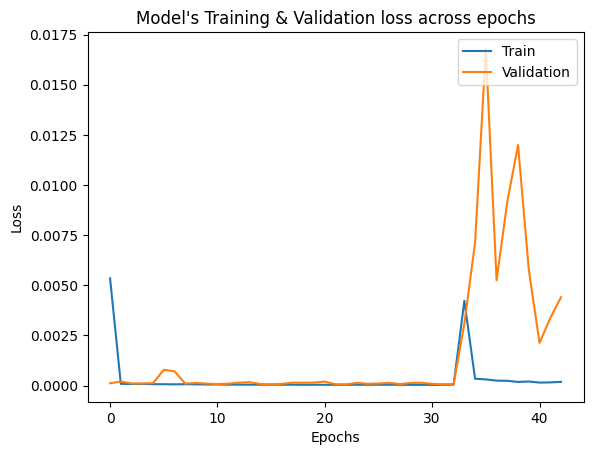

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


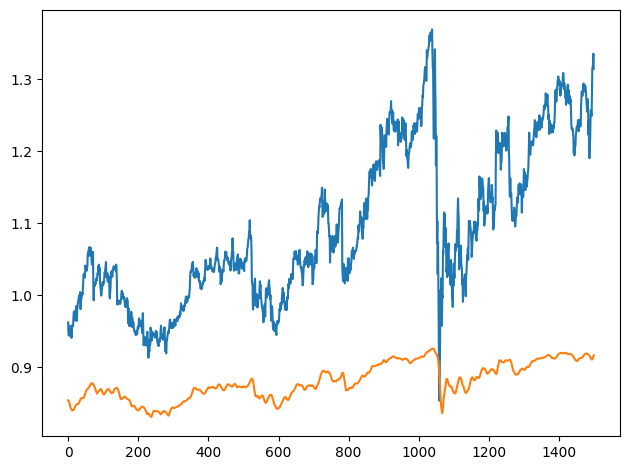

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794


In [485]:

plotloss(history)
print_result(model, 'SimpleRNN 4 units 50, Dropout, Adam 0.001', X_test, Y_test, 200)

### SGD

In [486]:

model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = len(target), activation='sigmoid')) 
# compiling RNN
model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs = 11, batch_size = 32,
                    callbacks=[ history, early_stopping]
                    )


Epoch 1/11


330/330 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0594 - mean_absolute_error: 0.2004 - root_mean_squared_error: 0.2376 - val_loss: 0.0184 - val_mean_absolute_error: 0.1188 - val_root_mean_squared_error: 0.1340
Epoch 2/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0037 - mean_absolute_error: 0.0488 - root_mean_squared_error: 0.0604 - val_loss: 0.0115 - val_mean_absolute_error: 0.0919 - val_root_mean_squared_error: 0.1057
Epoch 3/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0027 - mean_absolute_error: 0.0395 - root_mean_squared_error: 0.0520 - val_loss: 0.0102 - val_mean_absolute_error: 0.0891 - val_root_mean_squared_error: 0.0998
Epoch 4/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0023 - mean_absolute_error: 0.0357 - root_mean_squared_error: 0.0482 - val_loss: 0.0080 - val_mean_absolute_error: 0.0740 - val_root_mean_squared_error: 0.0880
Epoch 5/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0020 - mean_absolute_error: 0.0328 - root_mean_squared_er

In [487]:
model.evaluate(X_test,Y_test)
model.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0989 - mean_absolute_error: 0.3046 - root_mean_squared_error: 0.3118


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_53 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_54 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_55 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_56 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

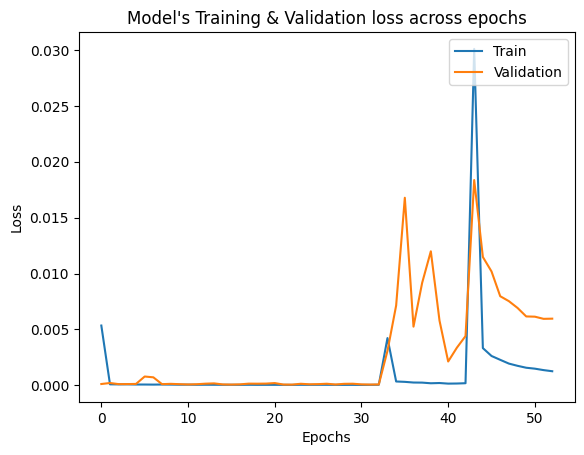

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


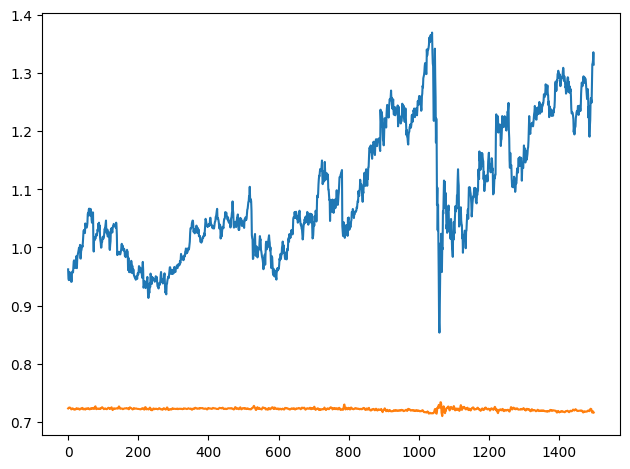

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683


In [488]:
plotloss(history)
print_result(model, 'SimpleRNN 4 units 50, Dropout, SGD 0.001', X_test, Y_test, 200)

# LSTM

### Adam

#### LSTM  64

In [489]:


model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])



Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0510 - val_loss: 5.3615e-04 - val_mean_absolute_error: 0.0169
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4590e-04 - mean_absolute_error: 0.0063 - val_loss: 3.8499e-04 - val_mean_absolute_error: 0.0144
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2675e-04 - mean_absolute_error: 0.0057 - val_loss: 0.0012 - val_mean_absolute_error: 0.0302
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4837e-04 - mean_absolute_error: 0.0065 - val_loss: 1.7545e-04 - val_mean_absolute_error: 0.0101
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.8618e-05 - mean_absolute_error: 0.0050 - val_loss: 1.7971e-04 - val_mean_absolute_error: 0.0104
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0269e-04 - mean_absolute_error: 0.0056 - val_loss: 1.5892e-04 - val_mean_absolute_error: 0.0095
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.5144e-05 

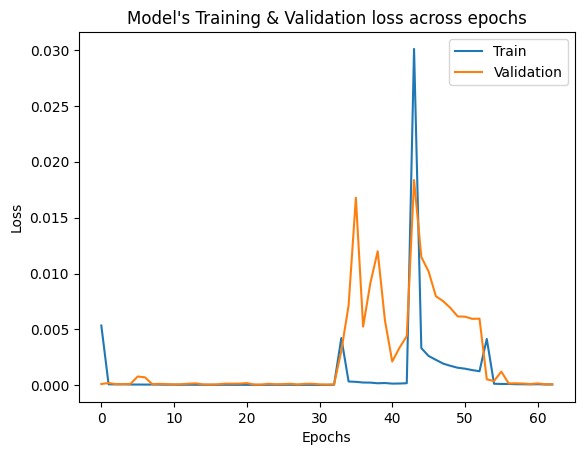

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


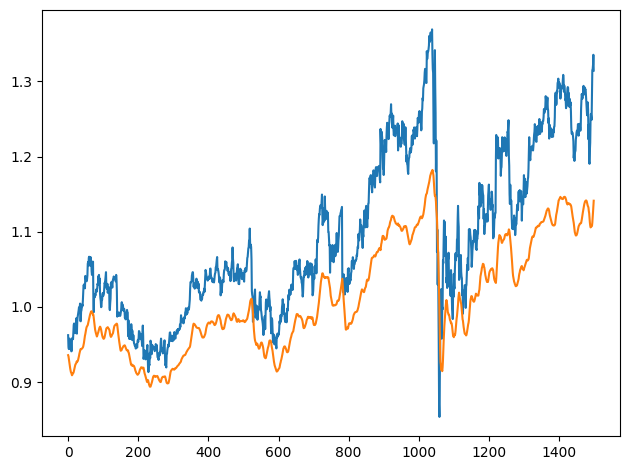

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021


In [490]:
plotloss(history)

print_result(model, 'LSTM 64, Adam 0.001', X_test, Y_test)


#### LSTM 2 layers 64,32

In [491]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(64, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(32, return_sequences = False))
regressorLSTM.add(Dense(25, activation="relu"))
regressorLSTM.add(Dense(len(target),activation="relu"))
regressorLSTM.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
regressorLSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0075 - mean_absolute_error: 0.0324 - val_loss: 2.7811e-04 - val_mean_absolute_error: 0.0126
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.7686e-04 - mean_absolute_error: 0.0071 - val_loss: 3.3373e-04 - val_mean_absolute_error: 0.0137
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.7551e-04 - mean_absolute_error: 0.0072 - val_loss: 5.2527e-04 - val_mean_absolute_error: 0.0193
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.7127e-04 - mean_absolute_error: 0.0071 - val_loss: 5.2466e-04 - val_mean_absolute_error: 0.0185
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.6294e-04 - mean_absolute_error: 0.0067 - val_loss: 3.0165e-04 - val_mean_absolute_error: 0.0132
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3849e-04 - mean_absolute_error: 0.0065 - val_loss: 3.6362e-04 - val_mean_absolute_error: 0.0147
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3046e

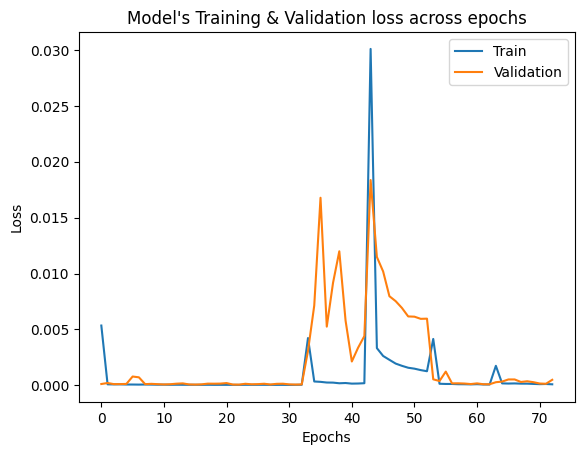

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


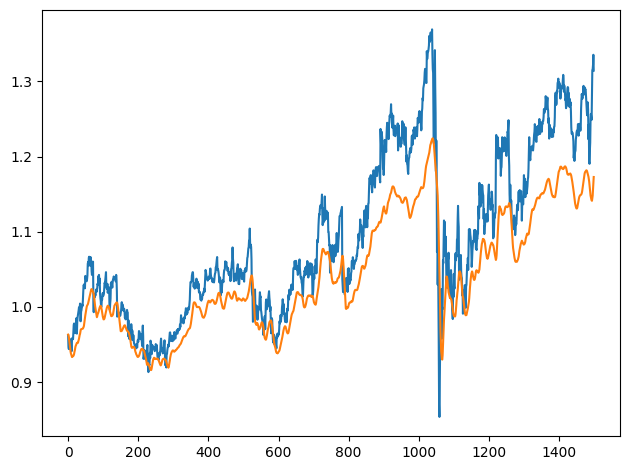

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893


In [492]:

plotloss(history)
print_result(regressorLSTM, 'LSTM 2 units 64,32  Adam 0.001', X_test, Y_test)


In [493]:

regressorLSTM.summary()
result = regressorLSTM.evaluate(X_test,Y_test)


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_129 (LSTM)                 │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_130 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,491 (353.48 KB)

 Trainable params: 30,163 (117.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,328 (235.66 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0342  


#### LSTM 32,16

In [494]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(16, return_sequences = False))

regressorLSTM.add(Dense(len(target),activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error"])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])



Epoch 1/200


165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0149 - mean_absolute_error: 0.0612 - val_loss: 6.3640e-04 - val_mean_absolute_error: 0.0180
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5879e-04 - mean_absolute_error: 0.0064 - val_loss: 4.2273e-04 - val_mean_absolute_error: 0.0162
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5458e-04 - mean_absolute_error: 0.0062 - val_loss: 3.9405e-04 - val_mean_absolute_error: 0.0148
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4696e-04 - mean_absolute_error: 0.0060 - val_loss: 5.0219e-04 - val_mean_absolute_error: 0.0163
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4688e-04 - mean_absolute_error: 0.0060 - val_loss: 6.7062e-04 - val_mean_absolute_error: 0.0195
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4659e-04 - mean_absolute_error: 0.0059 - val_loss: 3.2103e-04 - val_mean_absolute_error: 0.0133
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 

In [495]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0682


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_131 (LSTM)                 │ (None, 10, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_132 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

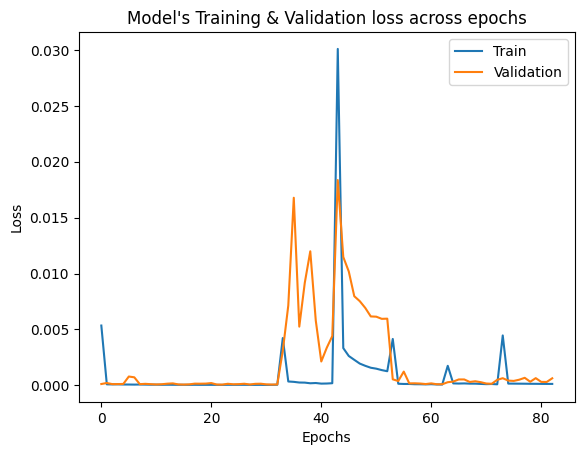

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


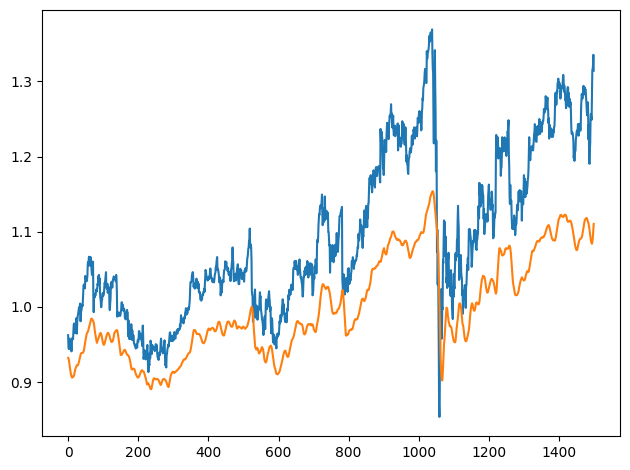

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611


In [496]:

plotloss(history)
print_result(regressorLSTM, 'LSTM 32, 16,   Adam 0.001', X_test, Y_test)



#### LSTM 4 layers 50 units dropout

In [497]:
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))
regressorLSTM.add(Dense(units=len(target),activation='relu'))
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])


Epoch 1/200


165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0810 - mean_absolute_error: 0.1584 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0851 - mean_absolute_error: 0.1638 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0865 - mean_absolute_error: 0.1667 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0868 - mean_absolute_error: 0.1671 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0852 - mean_absolute_error: 0.1647 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0866 - mean_absolute_error: 0.1676 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0867 - mean_absolute_error: 0.1669 -

In [498]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0614 - mean_absolute_error: 1.0273 


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_133 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_134 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_135 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_136 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

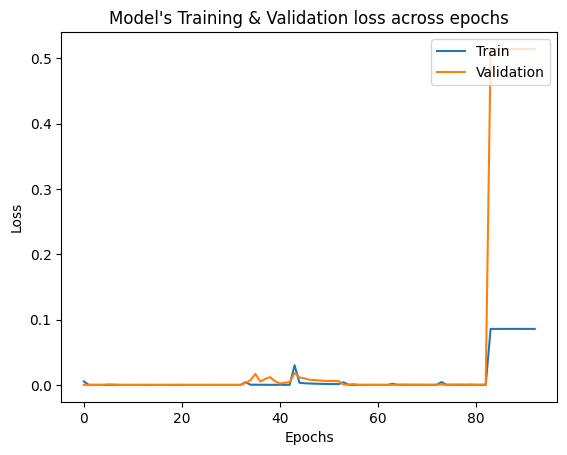

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


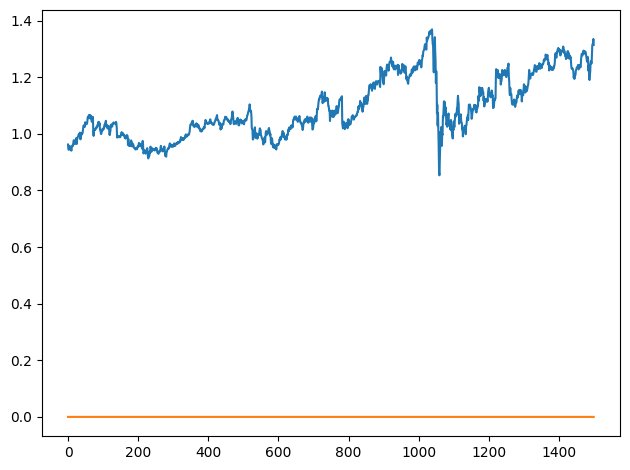

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249


In [499]:

plotloss(history)
print_result(regressorLSTM, 'LSTM 4 layers 50 units dropout', X_test, Y_test)


### Adamax

#### 64 units

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0513 - val_loss: 4.1508e-04 - val_mean_absolute_error: 0.0164
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.5214e-05 - mean_absolute_error: 0.0048 - val_loss: 3.6721e-04 - val_mean_absolute_error: 0.0150
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.5233e-05 - mean_absolute_error: 0.0049 - val_loss: 1.7148e-04 - val_mean_absolute_error: 0.0097
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.4069e-05 - mean_absolute_error: 0.0045 - val_loss: 3.0559e-04 - val_mean_absolute_error: 0.0139
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.7969e-05 - mean_absolute_error: 0.0052 - val_loss: 2.0482e-04 - val_mean_absolute_error: 0.0109
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.8782e-05 - mean_absolute_error: 0.0051 - val_loss: 1.3698e-04 - val_mean_absolute_error: 0.0087
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.7472e

Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_137 (LSTM)                 │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_183 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,197 (235.15 KB)

 Trainable params: 20,065 (78.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,132 (156.77 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - mean_absolute_error: 0.0407


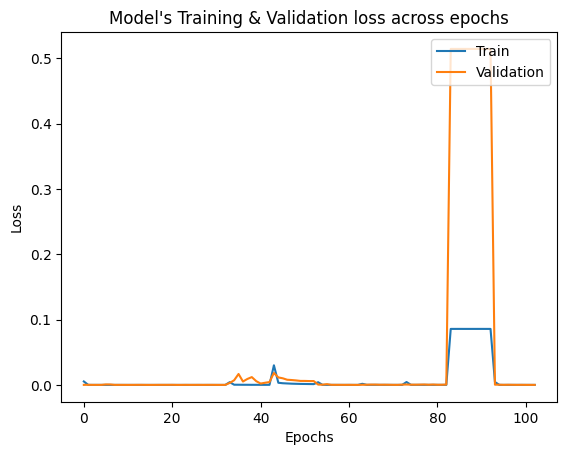

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


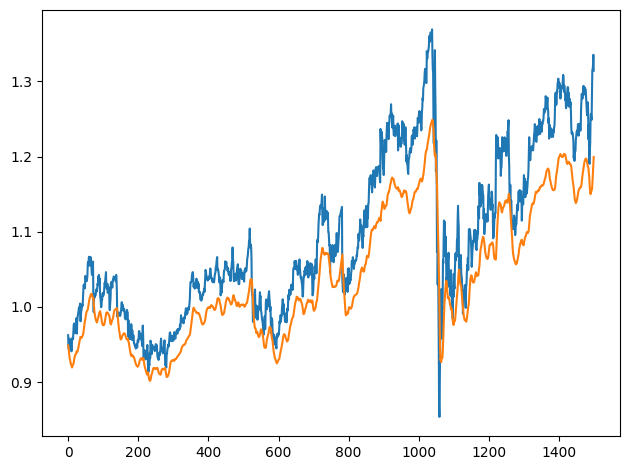

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532


In [500]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adamax(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 64, Dense 2 25,1,  Adamax', X_test, Y_test)

#### 2 layers 64,32

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0470 - val_loss: 2.5361e-04 - val_mean_absolute_error: 0.0118
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.4653e-04 - mean_absolute_error: 0.0059 - val_loss: 5.6724e-04 - val_mean_absolute_error: 0.0180
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.4910e-04 - mean_absolute_error: 0.0060 - val_loss: 3.2163e-04 - val_mean_absolute_error: 0.0133
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.4789e-04 - mean_absolute_error: 0.0059 - val_loss: 5.1417e-04 - val_mean_absolute_error: 0.0170
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.4705e-04 - mean_absolute_error: 0.0059 - val_loss: 4.0140e-04 - val_mean_absolute_error: 0.0149
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.4690e-04 - mean_absolute_error: 0.0060 - val_loss: 3.1791e-04 - val_mean_absolute_error: 0.0142
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.5986e

Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_138 (LSTM)                 │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_139 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,491 (353.48 KB)

 Trainable params: 30,163 (117.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,328 (235.66 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0298   


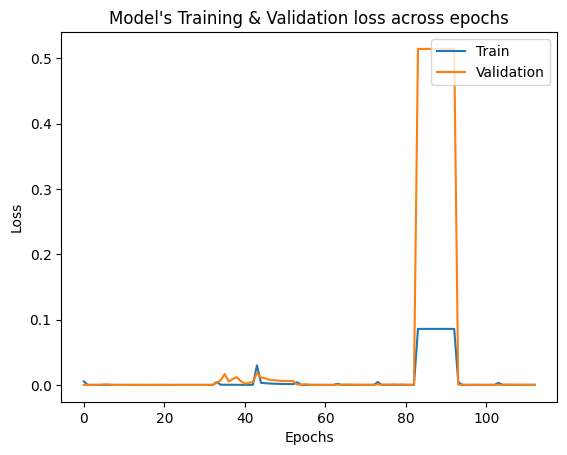

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


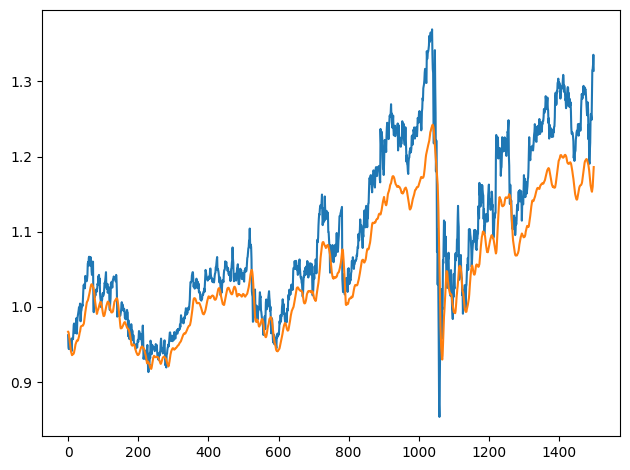

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032


In [501]:
model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(LSTM(32, return_sequences = False))
model.add(Dense(25, activation="relu"))
model.add(Dense(len(target),activation="relu"))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 64, 32  Adamax ', X_test, Y_test)

#### lstm 2 layers 64,32 units, dropout

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0149 - mean_absolute_error: 0.0550 - val_loss: 4.7607e-04 - val_mean_absolute_error: 0.0185
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.8727e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0022 - val_mean_absolute_error: 0.0418
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6.9210e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0011 - val_mean_absolute_error: 0.0286
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.3258e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0026 - val_mean_absolute_error: 0.0458
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.4906e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0015 - val_mean_absolute_error: 0.0335
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.1414e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0015 - val_mean_absolute_error: 0.0336
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.3438e-04 - mean_absolute_

Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_150 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_151 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - mean_absolute_error: 0.0273    


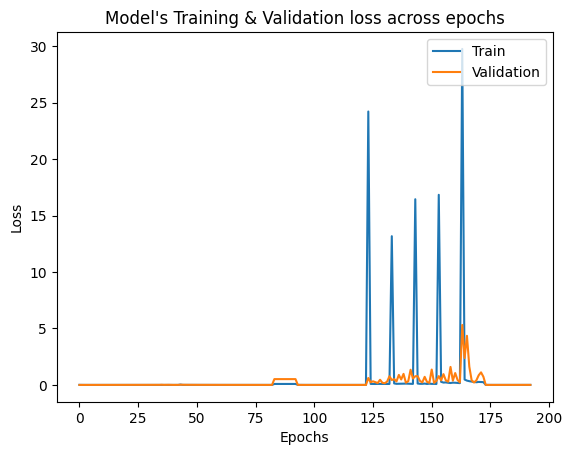

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


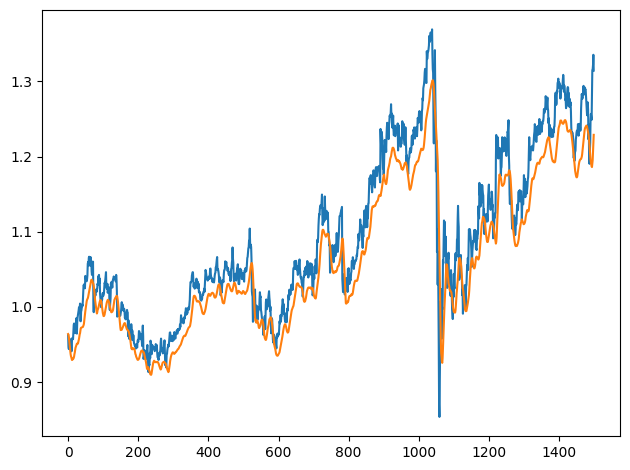

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


In [524]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(len(target),activation="relu"))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 64, 32, dropout  Adamax ', X_test, Y_test)

# GRU

### Adam

### 4 layers 50 units and dropout

In [502]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=len(target),activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])



Epoch 1/200


165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0066 - mean_absolute_error: 0.0398 - val_loss: 0.0017 - val_mean_absolute_error: 0.0350
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 2.7646e-04 - mean_absolute_error: 0.0089 - val_loss: 8.4516e-04 - val_mean_absolute_error: 0.0261
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.5981e-04 - mean_absolute_error: 0.0088 - val_loss: 4.0349e-04 - val_mean_absolute_error: 0.0154
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.9833e-04 - mean_absolute_error: 0.0075 - val_loss: 0.0015 - val_mean_absolute_error: 0.0340
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 2.0271e-04 - mean_absolute_error: 0.0079 - val_loss: 4.4091e-04 - val_mean_absolute_error: 0.0178
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.7093e-04 - mean_absolute_error: 0.0076 - val_loss: 4.1479e-04 - val_mean_absolute_error: 0.0159
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1

In [503]:
regressorGRU.summary()
result = regressorGRU.evaluate(X_test,Y_test)


Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_32 (GRU)                    │ (None, 10, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_33 (GRU)                    │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_34 (GRU)                    │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_35 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,705 (631.66 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,804 (421.11 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0828


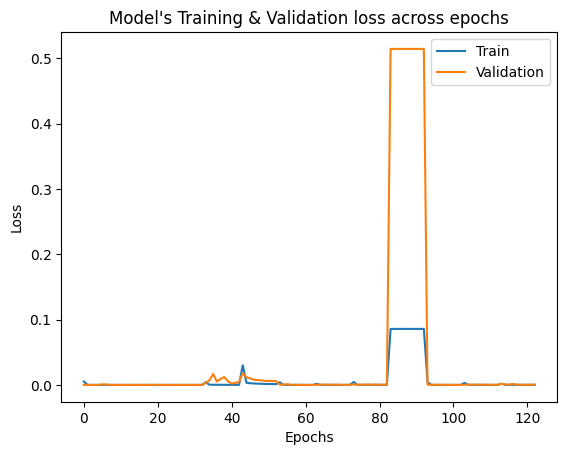

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


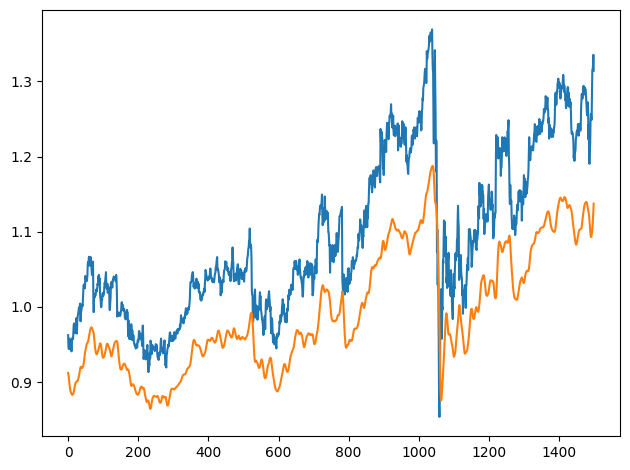

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


In [504]:

plotloss(history)

print_result(regressorGRU, 'GRU L 4 units 50, Adam 0.001', X_test, Y_test)


### Adamax

Epoch 1/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0482 - val_loss: 3.0830e-04 - val_mean_absolute_error: 0.0133
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.2159e-04 - mean_absolute_error: 0.0069 - val_loss: 2.3184e-04 - val_mean_absolute_error: 0.0115
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.1119e-04 - mean_absolute_error: 0.0066 - val_loss: 2.3578e-04 - val_mean_absolute_error: 0.0117
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 2.0631e-04 - mean_absolute_error: 0.0068 - val_loss: 3.8275e-04 - val_mean_absolute_error: 0.0149
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 2.1839e-04 - mean_absolute_error: 0.0070 - val_loss: 2.6839e-04 - val_mean_absolute_error: 0.0123
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.9462e-04 - mean_absolute_error: 0.0064 - val_loss: 2.4858e-04 - val_mean_absolute_error: 0.0119
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s

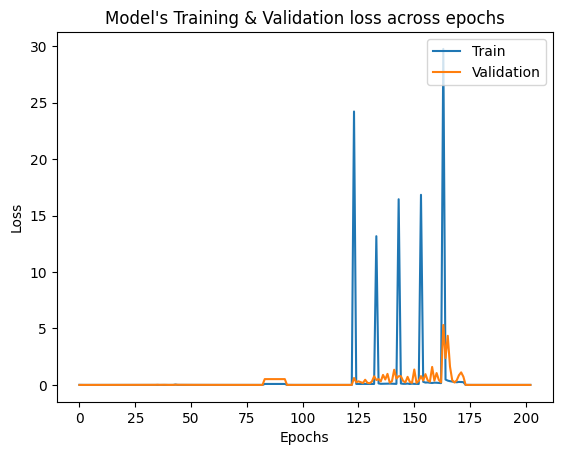

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


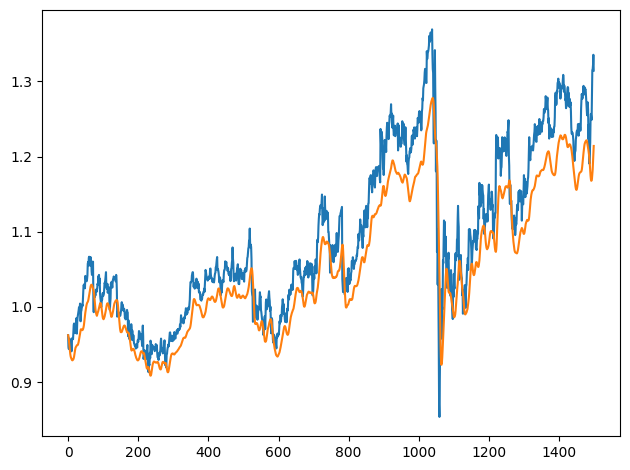

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


In [525]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adamax(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L 4 units 50, Adamax ', X_test, Y_test)

# Result

In [526]:
results

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


# drugi nacin

In [506]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [507]:
data

,Close
Date,
1962-01-02,0.263021
1962-01-03,0.257161
1962-01-04,0.259115
1962-01-05,0.253255
1962-01-08,0.250651
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [508]:
data2 = data.copy()
data2

,Close
Date,
1962-01-02,0.263021
1962-01-03,0.257161
1962-01-04,0.259115
1962-01-05,0.253255
1962-01-08,0.250651
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [509]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(data, 
                                '1962-01-05', 
                                '2021-12-17', 
                                n=3)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1962-01-05,0.263021,0.257161,0.259115,0.253255
1,1962-01-08,0.257161,0.259115,0.253255,0.250651
2,1962-01-09,0.259115,0.253255,0.250651,0.255208
3,1962-01-10,0.253255,0.250651,0.255208,0.256510
4,1962-01-11,0.250651,0.255208,0.256510,0.259115
...,...,...,...,...,...
15088,2021-12-13,55.000000,54.860001,56.279999,57.759998
15089,2021-12-14,54.860001,56.279999,57.759998,57.799999
15090,2021-12-15,56.279999,57.759998,57.799999,58.060001
15091,2021-12-16,57.759998,57.799999,58.060001,58.650002


## Priprema podataka

In [510]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((15093,), (15093, 3, 1), (15093,))

In [511]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train_1, y_train_1 = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val_1, y_val_1 = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test_1, y_test_1 = dates[q_90:], X[q_90:], y[q_90:]

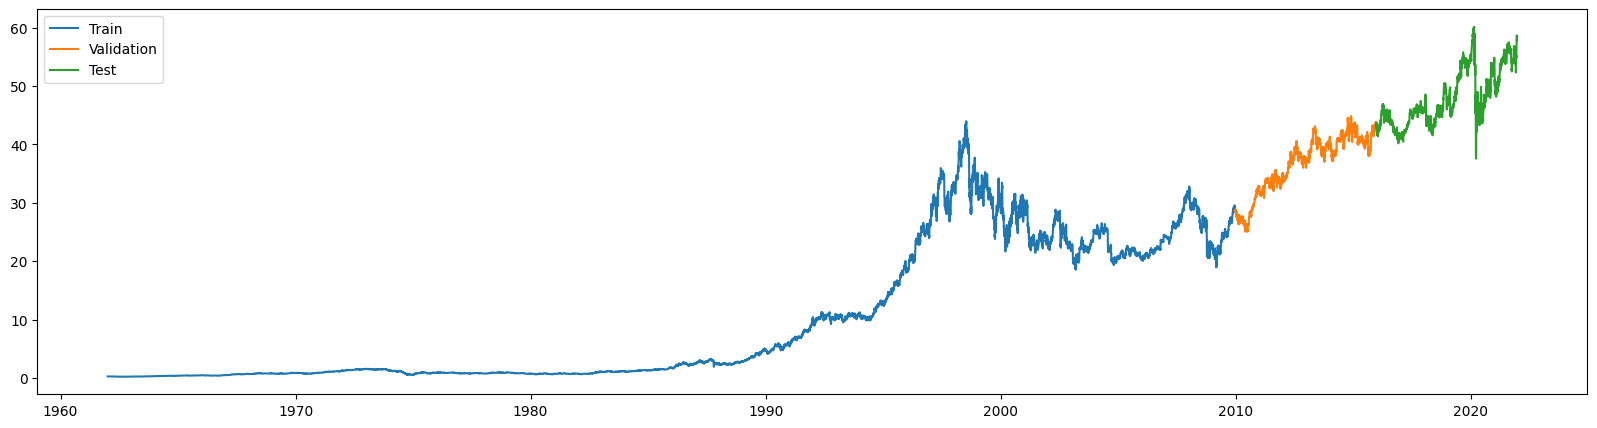

In [512]:
plt.figure(figsize=(20,5))
plt.plot(dates_train, y_train_1)
plt.plot(dates_val, y_val_1)
plt.plot(dates_test, y_test_1)

plt.legend(['Train', 'Validation', 'Test'])

## LSTM

### Adam

#### simple lstm

In [513]:

model = Sequential([Input((3, 1)),
                    LSTM(64),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 74.6133 - mean_absolute_error: 3.8215 - val_loss: 0.6144 - val_mean_absolute_error: 0.5508
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0932 - mean_absolute_error: 0.1503 - val_loss: 0.2372 - val_mean_absolute_error: 0.3462
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0875 - mean_absolute_error: 0.1472 - val_loss: 0.3200 - val_mean_absolute_error: 0.4671
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0812 - mean_absolute_error: 0.1400 - val_loss: 0.2406 - val_mean_absolute_error: 0.3931
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0984 - mean_absolute_error: 0.1565 - val_loss: 0.1698 - val_mean_absolute_error: 0.3057
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0847 - mean_absolute_error: 0.1428 - val_loss: 0.4579 - val_mean_absolute_error: 0.5709
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0860 - mean_absolute_error: 0.1402 - val_loss: 0

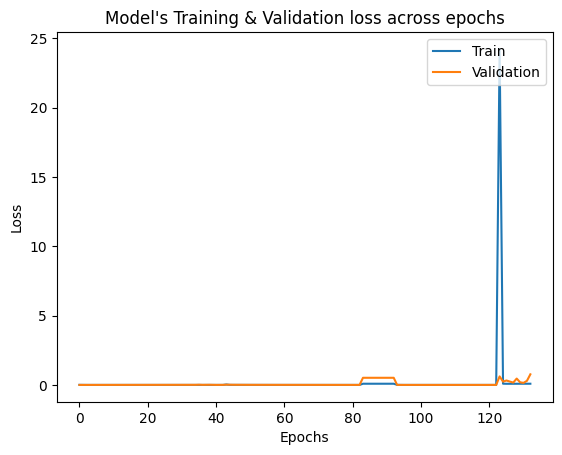

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


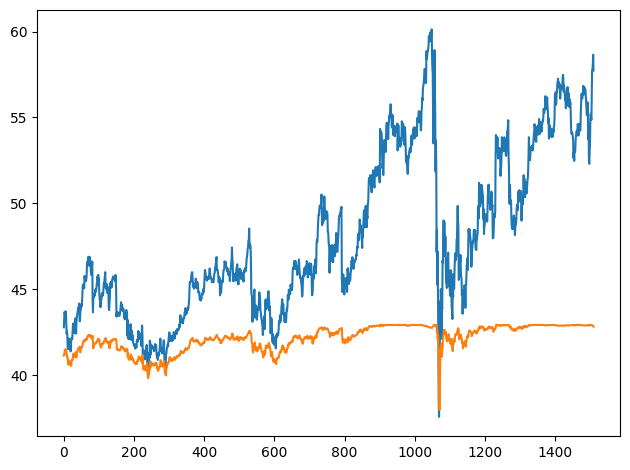

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


In [514]:
plotloss(history)
print_result(model, 'Data 2, LSTM 64', X_test_1, y_test_1)

#### GRU 128,64

Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_36 (GRU)                    │ (None, 3, 128)         │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_37 (GRU)                    │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,465 (369.00 KB)

 Trainable params: 94,465 (369.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 46.9840 - mean_absolute_error: 2.7383 - val_loss: 0.4320 - val_mean_absolute_error: 0.4761
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1102 - mean_absolute_error: 0.1778 - val_loss: 0.5155 - val_mean_absolute_error: 0.5567
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1033 - mean_absolute_error: 0.1745 - val_loss: 0.3124 - val_mean_absolute_error: 0.4422
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.1631 - val_loss: 0.8865 - val_mean_absolute_error: 0.8537
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0952 - mean_absolute_error: 0.1631 - val_loss: 0.4815 - val_mean_absolute_error: 0.5997
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1270 - mean_absolute_error: 0.1960 - val_loss: 0.9791 - val_mean_absolute_error: 0.8977
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1771 - val_loss: 0

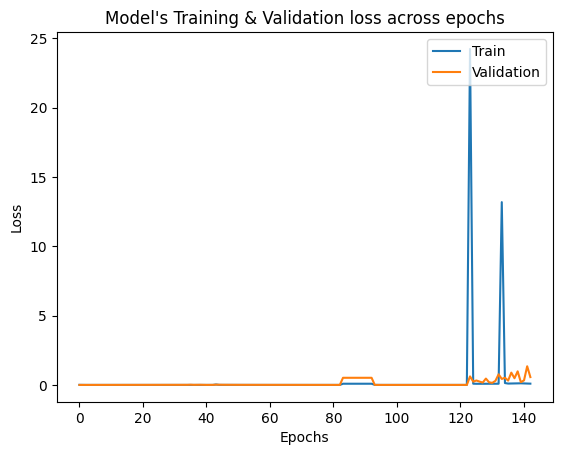

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


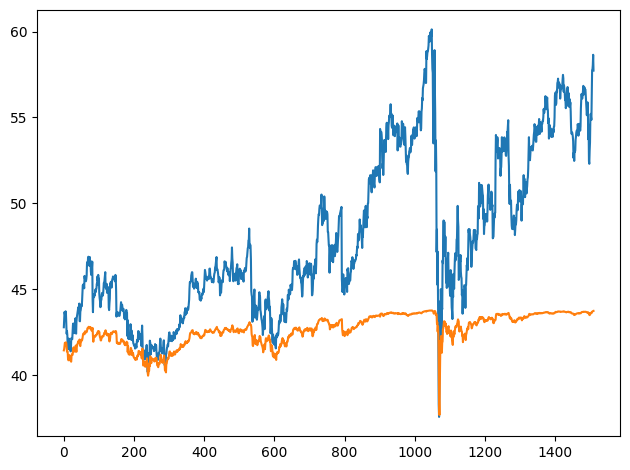

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


In [515]:
model = Sequential([
    Input(shape=(3, 1)),
    GRU(128, return_sequences=True),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])
plotloss(history)
print_result(model, 'Data 2 GRU 128,64', X_test_1, y_test_1)

#### LSTM Bidirectional

Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_198 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,753 (588.88 KB)

 Trainable params: 150,753 (588.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 55.8969 - mean_absolute_error: 3.1281 - val_loss: 0.7715 - val_mean_absolute_error: 0.6154
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1119 - mean_absolute_error: 0.1639 - val_loss: 0.7746 - val_mean_absolute_error: 0.7280
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1143 - mean_absolute_error: 0.1733 - val_loss: 0.3532 - val_mean_absolute_error: 0.4894
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0958 - mean_absolute_error: 0.1526 - val_loss: 0.2264 - val_mean_absolute_error: 0.3578
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1219 - mean_absolute_error: 0.1792 - val_loss: 0.7163 - val_mean_absolute_error: 0.7350
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0863 - mean_absolute_error: 0.1465 - val_loss: 0.2644 - val_mean_absolute_error: 0.4073
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1173 - mean_absolute_error: 0.1756 - val_loss: 0

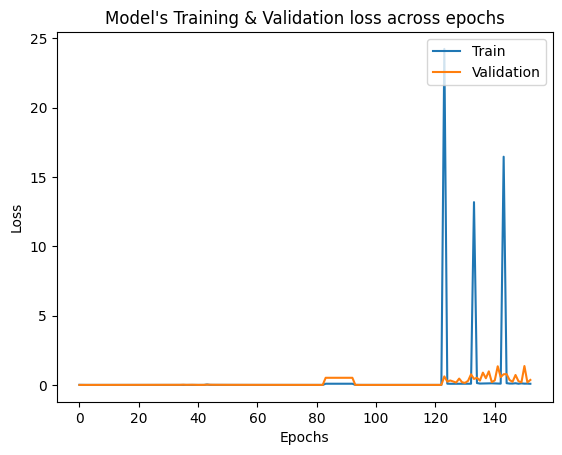

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


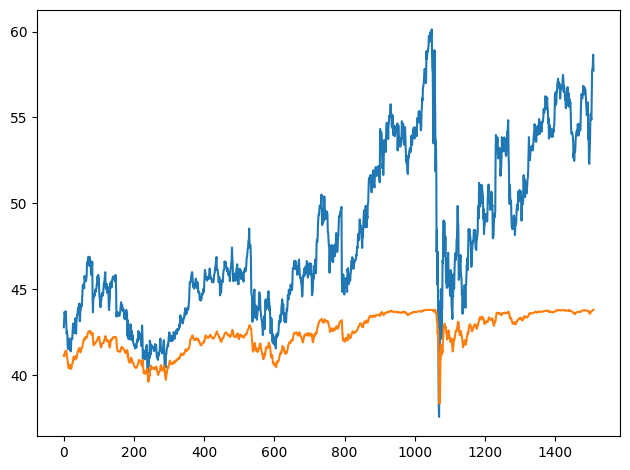

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


In [516]:
from keras.layers import  Bidirectional

model = Sequential([
    Input(shape=(3, 1)),
    Bidirectional(LSTM(128)),
    Dense(64, activation='relu'),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])
plotloss(history)
print_result(model, 'Data 2 Bidirectional LSTM 128', X_test_1, y_test_1)

#### LSTM 128, b64, Dropout

In [517]:
model = Sequential([
    Input(shape=(3, 1)),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_142 (LSTM)                 │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_143 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,881 (480.00 KB)

 Trainable params: 122,881 (480.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 57.1815 - mean_absolute_error: 3.2444 - val_loss: 0.7827 - val_mean_absolute_error: 0.6301
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2790 - mean_absolute_error: 0.2903 - val_loss: 0.4032 - val_mean_absolute_error: 0.4469
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1936 - mean_absolute_error: 0.2366 - val_loss: 0.9569 - val_mean_absolute_error: 0.8522
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2060 - mean_absolute_error: 0.2442 - val_loss: 0.4069 - val_mean_absolute_error: 0.4498
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2082 - mean_absolute_error: 0.2614 - val_loss: 0.2865 - val_mean_absolute_error: 0.3888
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1589 - mean_absolute_error: 0.2207 - val_loss: 1.5939 - val_mean_absolute_error: 1.1760
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2650 - mean_absolute_error: 0.2743 - val_loss: 0

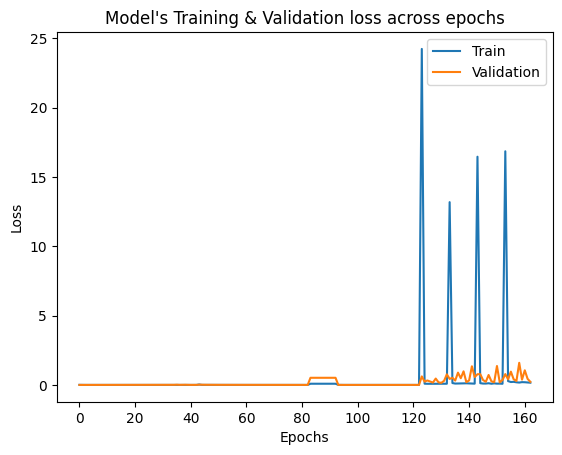

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


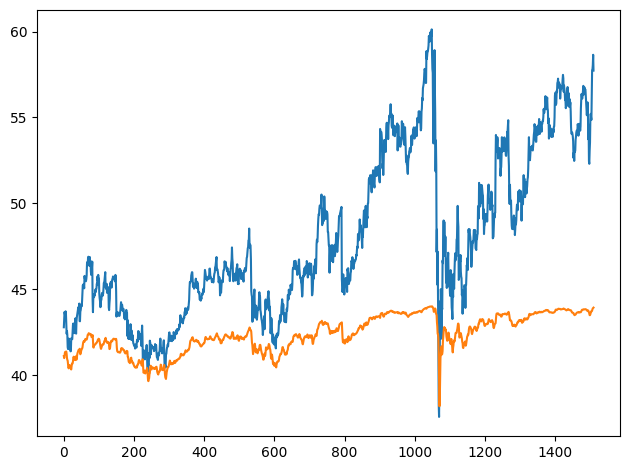

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


In [518]:
plotloss(history)
print_result(model, 'Data 2 LSTM 128 D0, LSTM 16', X_test_1, y_test_1)

#### 2 layers, 32, 16 units and dropout

In [519]:


regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(50, return_sequences = True,  input_shape = (X_train_1.shape[1],X_train_1.shape[2])))

regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))


regressorLSTM.add   (Dense(64, activation='relu')),
regressorLSTM.add  (Dense(32, activation='relu')),
regressorLSTM.add ( Dense(16, activation="relu"),)
regressorLSTM.add ( Dense(8, activation="relu")),
# regressorLSTM.add ( Dense(1, activation='linear'))

regressorLSTM.add(Dense(1,activation="relu"))



regressorLSTM.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
regressorLSTM.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 87.0102 - mean_absolute_error: 4.6411 - val_loss: 5.3111 - val_mean_absolute_error: 1.7337
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5658 - mean_absolute_error: 0.4085 - val_loss: 2.3795 - val_mean_absolute_error: 1.4289
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3909 - mean_absolute_error: 0.3577 - val_loss: 4.3529 - val_mean_absolute_error: 2.0170
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3844 - mean_absolute_error: 0.3490 - val_loss: 1.6234 - val_mean_absolute_error: 1.1548
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2754 - mean_absolute_error: 0.3011 - val_loss: 0.4139 - val_mean_absolute_error: 0.4566
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3196 - mean_absolute_error: 0.3200 - val_loss: 0.2125 - val_mean_absolute_error: 0.3225
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2612 - mean_absolute_error: 0.3031 - val_loss:

In [520]:
regressorLSTM.summary()


Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_144 (LSTM)                 │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_145 (LSTM)                 │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_146 (LSTM)                 │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_147 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,053 (902.55 KB)

 Trainable params: 77,017 (300.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 154,036 (601.71 KB)

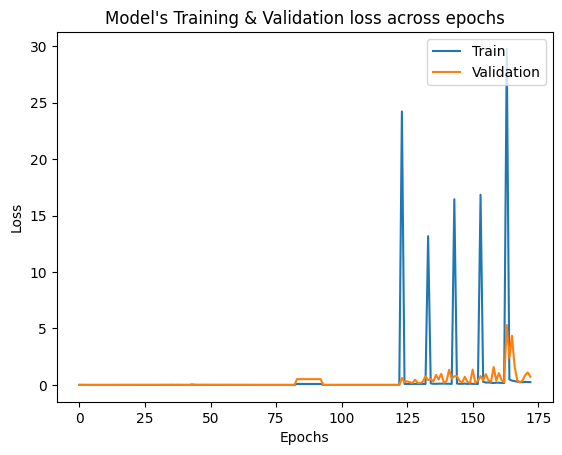

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


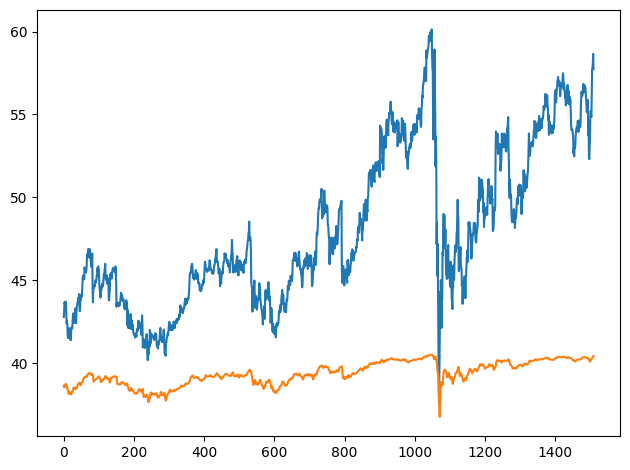

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.211220,-3.428099,0.051794
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.369638,-11.711479,0.148683
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


In [521]:

plotloss(history)
print_result(regressorLSTM, 'Data 2 LSTM 32 D0,2 LSTM 16', X_test_1, y_test_1)



## result

In [527]:
results.sort_values(by='mean sqrd')

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.008997,0.983667,0.000191
15,"LSTM 50, 50 Adamax",0.030535,0.867174,0.001554
16,"LSTM 64, 32, dropout Adamax",0.034060,0.857261,0.001670
17,"GRU L 4 units 50, Adamax",0.041143,0.801976,0.002316
8,"LSTM 64, 32 Adamax",0.044923,0.740824,0.003032
7,"LSTM 64, Dense 2 25,1, Adamax",0.053027,0.698055,0.003532
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.051670,0.667140,0.003893
3,"LSTM 64, Adam 0.001",0.080581,0.314257,0.008021
5,"LSTM 32, 16, Adam 0.001",0.092469,0.092836,0.010611
9,"GRU L 4 units 50, Adam 0.001",0.098855,0.069613,0.010883


DODATI:
- custom loss funkcija i jos neki loss mozda isto
- Conv - ovo istraziti
- ispitati gde sve dodati dropout i izbaciti visak
- mozda za GRU jos neka kombinacija layera